<a href="https://colab.research.google.com/github/vasthav2k/deeplearning/blob/master/WEEK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-05-27 19:29:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  42.5MB/s    in 3.4s    

2020-05-27 19:29:24 (42.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

localzip='/tmp/horse-or-human.zip'
zip_ref=zipfile.ZipFile(localzip,'r')

In [0]:
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')
train_human_dir=os.path.join('/tmp/horse-or-human/humans')

In [5]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[0:10])

['horse36-8.png', 'horse38-4.png', 'horse26-0.png', 'horse50-5.png', 'horse34-9.png', 'horse29-6.png', 'horse34-8.png', 'horse02-6.png', 'horse14-2.png', 'horse16-1.png']


In [0]:
train_human_names=os.listdir(train_human_dir)

In [7]:
print(train_human_names[:10])

['human16-02.png', 'human01-15.png', 'human08-12.png', 'human13-22.png', 'human02-09.png', 'human16-14.png', 'human02-21.png', 'human01-22.png', 'human04-16.png', 'human16-03.png']


In [8]:
print('Training Horse Images:',len(train_horse_names))
print('Training Human Images:',len(train_human_names))

Training Horse Images: 500
Training Human Images: 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nr=4
nc=4

pic_index=0

In [13]:
fig=plt.gcf()


<Figure size 432x288 with 0 Axes>

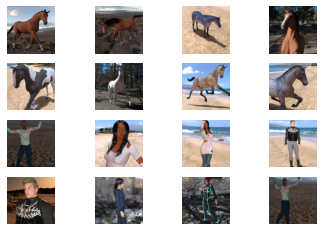

In [15]:
fig.set_size_inches(nc*4,nr*4)

pic_index+=8

next_horse=[os.path.join(train_horse_dir,fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human=[os.path.join(train_human_dir,fname) for fname in train_human_names[pic_index-8:pic_index]]

for i,img_path in enumerate(next_horse+next_human):
  sp=plt.subplot(nc,nr,i+1)
  sp.axis('Off')

  img=mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [0]:
model=Sequential([
                  Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(300,300,3)),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                  MaxPooling2D(pool_size=(2,2)),
                  Flatten(),
                  Dense(units=512,activation='relu'),
                  Dense(units='1',activation='sigmoid')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [0]:
from tensorflow.keras.optimizers import RMSprop


In [0]:
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen=ImageDataGenerator(rescale=1/255)

In [25]:
train_generator=train_datagen.flow_from_directory('/tmp/horse-or-human/',target_size=(300,300),batch_size=128,class_mode='binary')

Found 1027 images belonging to 2 classes.


In [26]:
history=model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 7s 876ms/step - loss: 0.7811 - accuracy: 0.5462
Epoch 2/15
8/8 [==============================] - 5s 611ms/step - loss: 0.7421 - accuracy: 0.7086
Epoch 3/15
8/8 [==============================] - 5s 622ms/step - loss: 0.4357 - accuracy: 0.8476
Epoch 4/15
8/8 [==============================] - 6s 715ms/step - loss: 0.2642 - accuracy: 0.8832
Epoch 5/15
8/8 [==============================] - 5s 616ms/step - loss: 0.1211 - accuracy: 0.9555
Epoch 6/15
8/8 [==============================] - 5s 613ms/step - loss: 0.5823 - accuracy: 0.8343
Epoch 7/15
8/8 [==============================] - 5s 614ms/step - loss: 0.1541 - accuracy: 0.9388
Epoch 8/15
8/8 [==============================] - 5s 591ms/step - loss: 0.0732 - accuracy: 0.9733
Epoch 9/15
8/8 [==============================] - 5s 597ms/step - loss: 0.1205 - accuracy: 0.9544
Epoch 10/15
8/8 [==============================] - 5s 600ms/step - loss: 0.0518 - accuracy: 0.9778
Epoch 11/15
8/8 [==

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [31]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/'+fn
  img=image.load_img(path,target_size=(300,300))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)

  images=np.vstack([x])
  classes=model.predict(images,batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn,"is a human")
  else:
    print(fn,"is a horse")

Saving horse-4.jfif to horse-4.jfif
[0.]
horse-4.jfif is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


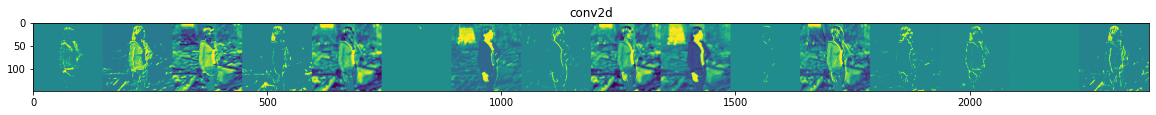

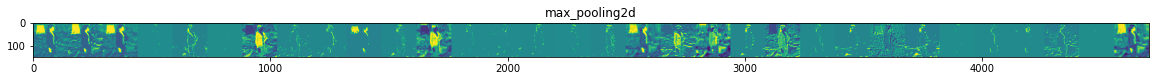

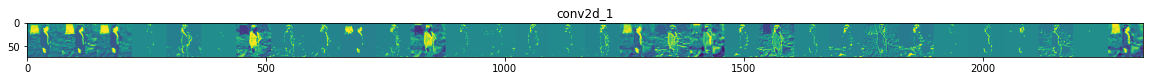

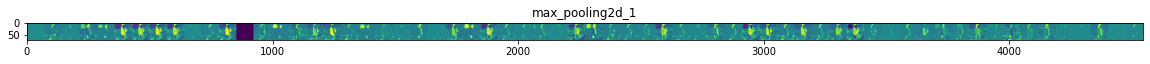

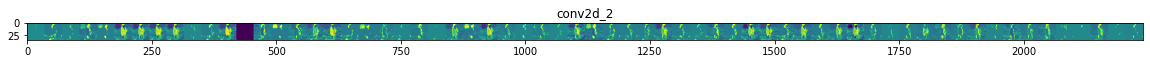

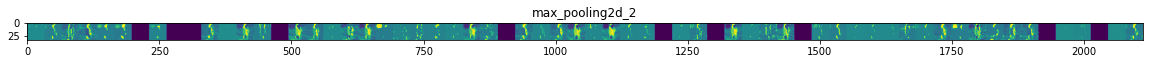

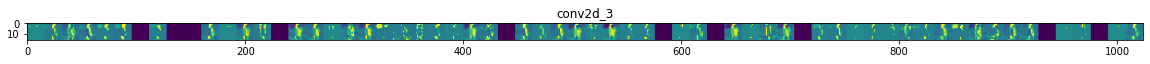

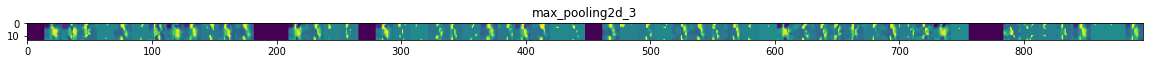

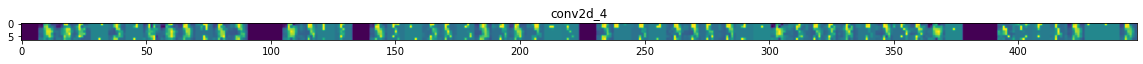

In [33]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')